In [33]:
import numpy as np
import torch as th
import glob
from PIL import Image
import matplotlib.pyplot as plt
import cv2

def create_image_grid(images, n_rows=1, text_labels=[]):
    """
    Creates a grid of images from a list of NumPy arrays.
    
    Parameters:
    - images: List of np.array, each representing an image.
    - n_rows: Number of rows in the grid.
    
    Returns:
    - A matplotlib figure containing the image grid.
    """
    n_images = len(images)
    n_cols = (n_images + n_rows - 1) // n_rows  # Calculate number of columns needed
    
    # Get the height and width of the images (assuming all images are the same size)
    # img_height, img_width = images[0].shape[:2]

    # Add zero images if the number of images is less than needed to fill the grid
    images += [np.zeros_like(images[0]) for _ in range(n_rows * n_cols - n_images)]
    
    # Create the grid by concatenating images
    rows = []
    for i in range(n_rows):
        row_images = images[i * n_cols:(i + 1) * n_cols]
        rows.append(np.concatenate(row_images, axis=1))
    
    grid_image = np.concatenate(rows, axis=0)

    # Add text labels to the grid
    img_height, img_width = images[0].shape[:2]
    for i, text_label in enumerate(text_labels):
        # plt.text((i % n_cols) * img_width, (i // n_cols) * img_height, text_label, color='red', fontsize=12)
        if isinstance(text_label, str):
            plt.text((i % n_cols) * img_width, -2, text_label, color='red', fontsize=20)
        else:
            plt.text((i % n_cols) * img_width, -2, f'{float(text_label):.5f}', color='red', fontsize=20)

    return grid_image

def face_segment(segment_part, img):
    
    if isinstance(img, Image.Image):
        face_segment_anno = np.array(img)
    else:
        face_segment_anno = img
        
    bg = (face_segment_anno == 0)
    skin = (face_segment_anno == 1)
    l_brow = (face_segment_anno == 2)
    r_brow = (face_segment_anno == 3)
    l_eye = (face_segment_anno == 4)
    r_eye = (face_segment_anno == 5)
    eye_g = (face_segment_anno == 6)
    l_ear = (face_segment_anno == 7)
    r_ear = (face_segment_anno == 8)
    ear_r = (face_segment_anno == 9)
    nose = (face_segment_anno == 10)
    mouth = (face_segment_anno == 11)
    u_lip = (face_segment_anno == 12)
    l_lip = (face_segment_anno == 13)
    neck = (face_segment_anno == 14)
    neck_l = (face_segment_anno == 15)
    cloth = (face_segment_anno == 16)
    hair = (face_segment_anno == 17)
    hat = (face_segment_anno == 18)
    face = np.logical_or.reduce((skin, l_brow, r_brow, l_eye, r_eye, eye_g, l_ear, r_ear, ear_r, nose, mouth, u_lip, l_lip))

    if segment_part == 'faceseg_face':
        seg_m = face
    elif segment_part == 'faceseg_head':
        seg_m = (face | neck | hair)
    elif segment_part == 'faceseg_nohead':
        seg_m = ~(face | neck | hair)
    elif segment_part == 'faceseg_face&hair':
        seg_m = ~bg
    elif segment_part == 'faceseg_bg_noface&nohair':
        seg_m = (bg | hat | neck | neck_l | cloth) 
    elif segment_part == 'faceseg_bg&ears_noface&nohair':
        seg_m = (bg | hat | neck | neck_l | cloth) | (l_ear | r_ear | ear_r)
    elif segment_part == 'faceseg_bg':
        seg_m = bg
    elif segment_part == 'faceseg_bg&noface':
        seg_m = (bg | hair | hat | neck | neck_l | cloth)
    elif segment_part == 'faceseg_faceskin':
        seg_m = skin
    elif segment_part == 'faceseg_faceskin&nose':
        seg_m = (skin | nose)
    elif segment_part == 'faceseg_faceskin&nose&mouth&eyebrows':
        seg_m = (skin | nose | mouth | u_lip | l_lip | l_brow | r_brow | l_eye | r_eye)
    elif segment_part == 'faceseg_faceskin&nose&mouth&eyebrows&eyes&glasses':
        seg_m = (skin | nose | mouth | u_lip | l_lip | l_brow | r_brow | l_eye | r_eye | eye_g)
        # seg_m = (skin | nose | mouth | u_lip | l_lip | l_brow | r_brow)
    elif segment_part == 'faceseg_face_noglasses':
        seg_m = (~eye_g & face)
    elif segment_part == 'faceseg_face_noglasses_noeyes':
        seg_m = (~(l_eye | r_eye) & ~eye_g & face)
    elif segment_part == 'faceseg_eyes&glasses':
        seg_m = (l_eye | r_eye | eye_g)
    elif segment_part == 'faceseg_glasses':
        seg_m = eye_g
    elif segment_part == 'faceseg_hair':
        seg_m = hair
    elif segment_part == 'faceseg_eyes':
        seg_m = (l_eye | r_eye)
    elif segment_part == 'faceseg_ears':
        seg_m = (l_ear | r_ear | ear_r)
    elif segment_part == 'faceseg_nose':
        seg_m = nose
    elif segment_part == 'faceseg_mouth':
        seg_m = (mouth | u_lip | l_lip)
    elif segment_part == 'faceseg_neck':
        seg_m = neck
    elif segment_part == 'faceseg_eyes&ears&nose&mouth':
        seg_m = (l_eye | r_eye | l_ear | r_ear | ear_r | nose | mouth | u_lip | l_lip)
    # elif (segment_part == 'sobel_bg_mask') or (segment_part == 'laplacian_bg_mask') or (segment_part == 'sobel_bin_bg_mask'):
    elif segment_part in ['sobel_bg_mask', 'laplacian_bg_mask', 'sobel_bin_bg_mask']:
        seg_m = ~(face | neck | hair)
    elif segment_part in ['canny_edge_bg_mask']:
        seg_m = ~(face | neck | hair) | (l_ear | r_ear)
    else: raise NotImplementedError(f"Segment part: {segment_part} is not found!")
    
    out = seg_m
    return out

(256, 256, 3) (256, 256, 3)
0 17


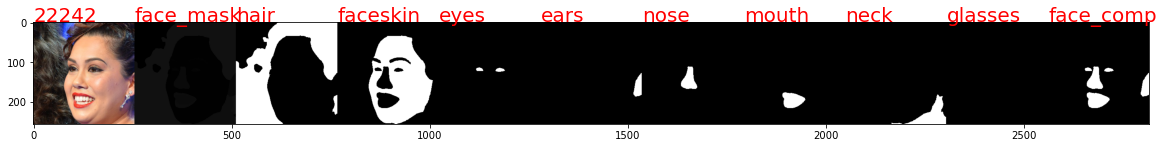

(256, 256, 3) (256, 256, 3)
0 17


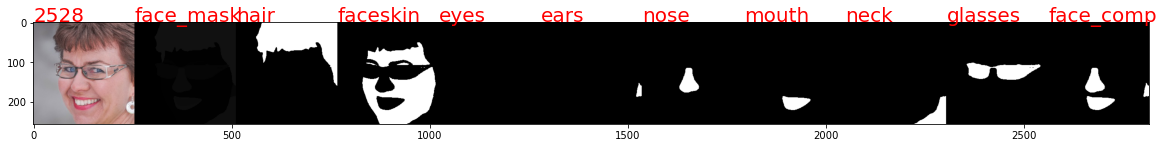

(256, 256, 3) (256, 256, 3)
0 17


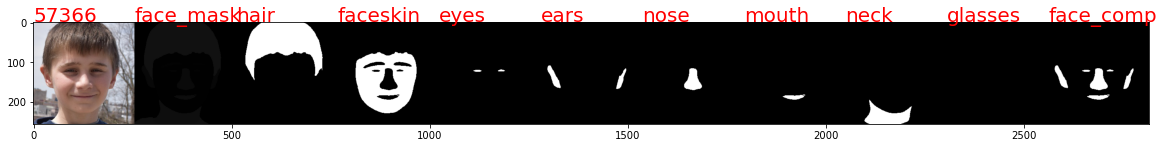

(256, 256, 3) (256, 256, 3)
0 17


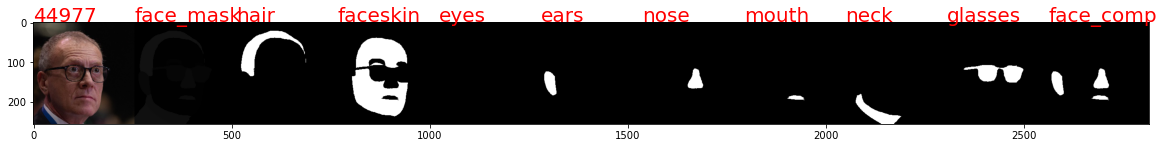

(256, 256, 3) (256, 256, 3)
0 18


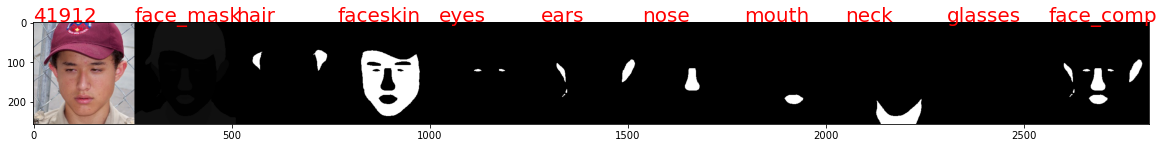

(256, 256, 3) (256, 256, 3)
0 17


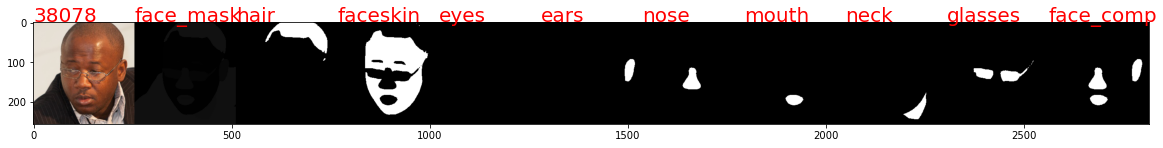

(256, 256, 3) (256, 256, 3)
0 18


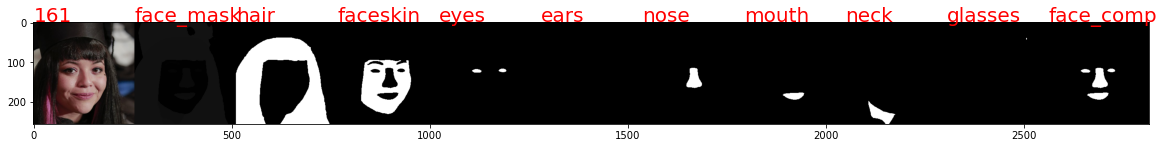

(256, 256, 3) (256, 256, 3)
0 17


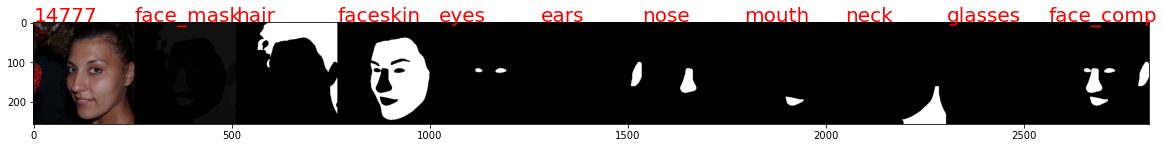

(256, 256, 3) (256, 256, 3)
0 17


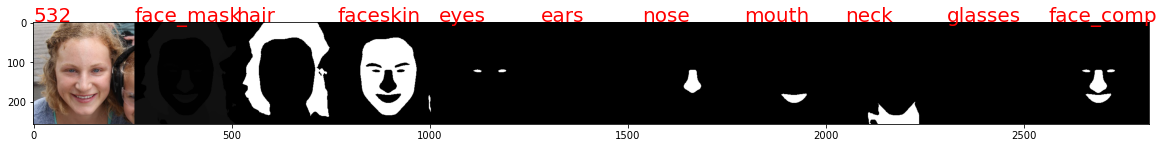

(256, 256, 3) (256, 256, 3)
0 18


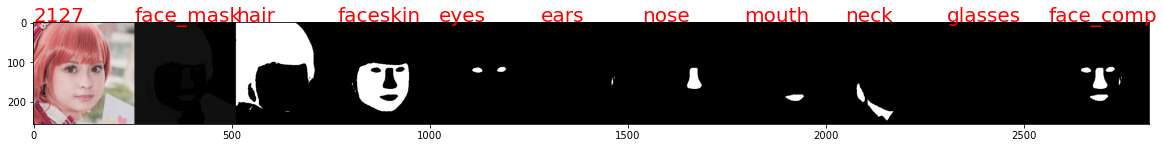

(256, 256, 3) (256, 256, 3)
0 18


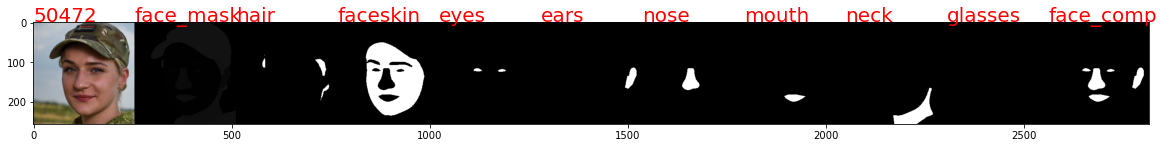

In [38]:
import numpy as np
import torch as th

set_ = 'train'
path = '/data/mint/DPM_Dataset/ffhq_256_with_anno/'
img_path = f'{path}/ffhq_256/{set_}'
segm_path = f'{path}/face_segment/{set_}/anno/'

for i, p in enumerate(glob.glob(img_path + '/*.jpg')):
    img_name = p.split('/')[-1].split('.')[0]
    img = np.array(Image.open(p))
    segm = np.array(Image.open(segm_path + '/anno_' + img_name + '.png'))
    segm = np.repeat(segm[..., None], 3, axis=-1)
    print(segm.shape, img.shape)
    print(segm.min(), segm.max())
    
    fig = plt.figure(figsize=(20, 10))
    plt.imshow(create_image_grid([img, 
                                  segm, 
                                  face_segment('faceseg_hair', segm)*255,
                                  face_segment('faceseg_faceskin', segm)*255,
                                  face_segment('faceseg_eyes', segm)*255,
                                  face_segment('faceseg_ears', segm)*255,
                                  face_segment('faceseg_nose', segm)*255,
                                  face_segment('faceseg_mouth', segm)*255,
                                  face_segment('faceseg_neck', segm)*255,
                                  face_segment('faceseg_glasses', segm)*255,
                                  face_segment('faceseg_eyes&ears&nose&mouth', segm)*255,
                                ], 
                                 text_labels=[img_name, 'face_mask', 'hair', 'faceskin', 'eyes', 'ears', 'nose', 'mouth', 'neck', 'glasses', 'face_comp'], n_rows=1))
    plt.show()
    if i == 10: break